In [93]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [94]:
dta = pd.read_csv("Bank Marketing FULL.csv")
print dta.columns

# 'y' is the outcome variable

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'],
      dtype='object')


In [95]:
dta.groupby('y').mean()
# Sorting by outcome status we see that the mean age for "yes" clients is 1 year greater
# than "no" clients, their call duration is over 330 seconds (5.5 minutes) greater, and the
# days since previous contact much shorter.

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [96]:
dta.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


In [97]:
freqcross = pd.crosstab(index=dta['y'], columns="Count")

print freqcross 
# The number of people who didn't subscribe to a term deposit is almost 9 times greater 
# than the number of people who did.

col_0  Count
y           
no     36548
yes     4640


In [98]:
educ_cross = pd.crosstab(dta['education'],dta['y'])
print educ_cross

# Outcome frequencies broken down by education level

y                       no   yes
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown               1480   251


Axes(0.125,0.125;0.775x0.775)
17
98
40.0240604059


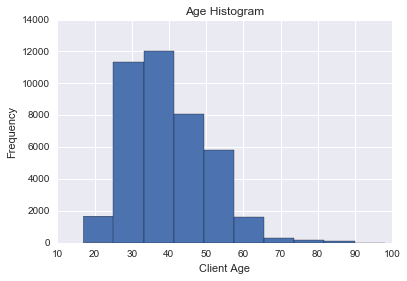

In [99]:
%matplotlib inline

agehist = dta.age.hist()
plt.title('Age Histogram')
plt.xlabel('Client Age')
plt.ylabel('Frequency')

print agehist
print dta.age.min()
print dta.age.max()
print dta.age.mean()

In [100]:
# binning age range for easier visualization
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
agegrp = ['10-20',
          '20-30',
          '30-40',
          '40-50',
          '50-60',
          '60-70',
          '70-80',
          '80-90',
          '90-100']

age_group = pd.cut(dta['age'], bins, labels=agegrp)
dta['age_group'] = pd.cut(dta['age'], bins, labels=agegrp)
print pd.value_counts(dta['age_group'])

30-40     16385
40-50     10240
20-30      7243
50-60      6270
60-70       488
70-80       303
10-20       140
80-90       109
90-100       10
dtype: int64


Axes(0.125,0.125;0.775x0.775)


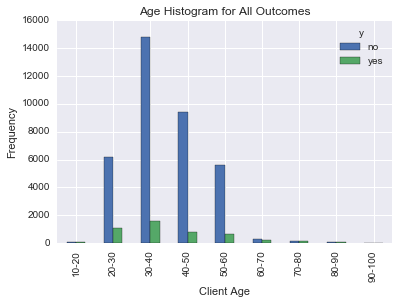

In [101]:
agehist = pd.crosstab(dta.age_group, dta.y).plot(kind='bar')
plt.title('Age Histogram for All Outcomes')
plt.xlabel('Client Age')
plt.ylabel('Frequency')

print agehist

In [102]:
defaultcross = pd.crosstab(dta['default'], dta['y'])
housingcross = pd.crosstab(dta['housing'], dta['y'])
loancross = pd.crosstab(dta['loan'],dta['y'])

print defaultcross 
print housingcross
print loancross

# Client response breakdown by credit default status, and presence of housing or personal loan

y           no   yes
default             
no       28391  4197
unknown   8154   443
yes          3     0
y           no   yes
housing             
no       16596  2026
unknown    883   107
yes      19069  2507
y           no   yes
loan                
no       30100  3850
unknown    883   107
yes       5565   683


Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


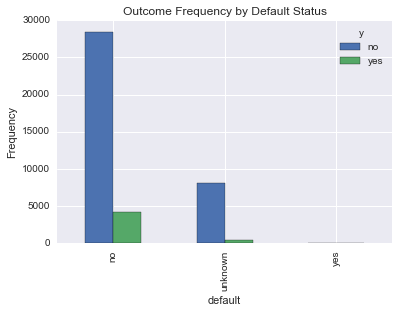

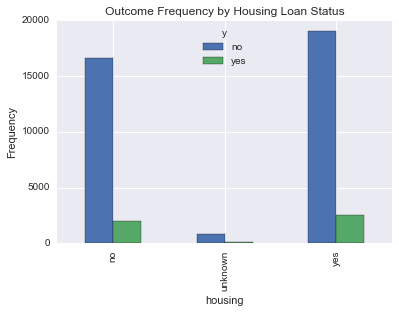

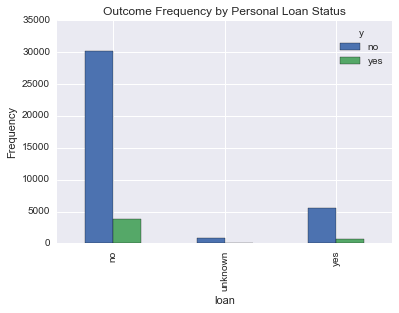

In [130]:
print defaultcross.plot(kind='bar')
plt.title('Outcome Frequency by Default Status')
plt.ylabel('Frequency')
print housingcross.plot(kind='bar')
plt.title('Outcome Frequency by Housing Loan Status')
plt.ylabel('Frequency')
print loancross.plot(kind='bar')
plt.title('Outcome Frequency by Personal Loan Status')
plt.ylabel('Frequency')

y             no   yes
contact               
cellular   22291  3853
telephone  14257   787
Axes(0.125,0.125;0.775x0.775)


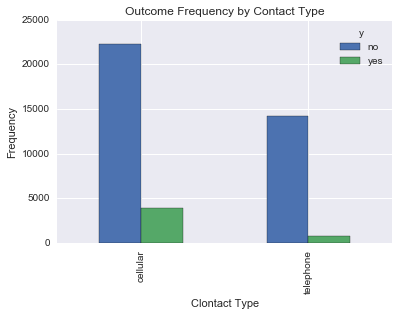

In [131]:
contactcross = pd.crosstab(dta['contact'],dta['y'])
contacthist = pd.crosstab(dta['contact'],dta['y']).plot(kind='bar')
plt.title('Outcome Frequency by Contact Type')
plt.xlabel('Clontact Type')
plt.ylabel('Frequency')
                                                        
print contactcross
print contacthist

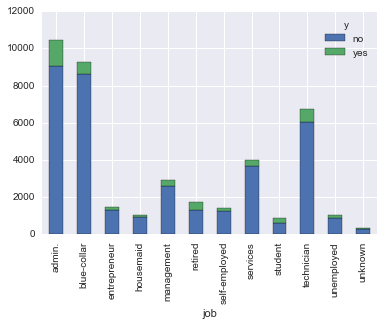

In [117]:
pd.crosstab(dta['job'],dta['y']).plot(kind='bar', stacked=True)

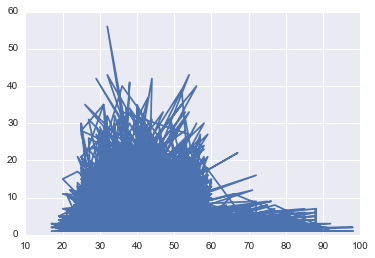

In [137]:
plt.plot(dta.age, dta.campaign)